### Spatial Weights

In [55]:
import libpysal
from libpysal.weights import Queen, Rook, KNN, DistanceBand, Kernel
import numpy as np
import pandas as pd
import geopandas as gpd
from splot.libpysal import plot_spatial_weights
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# !pip install libpysal
# !pip install splot
# !pip install spaghetti pysal

### Weight Types

#### Contiguity

**Queen Weights**: reflects the adjacency relationship between two polygons as a binary indicator denoting whether or not the polygons share an edge or vertex with each other

In [16]:
path = 'data/scipy/scag_region.gpkg'
df = gpd.read_file(path)
df.head()

,geoid,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,...,year,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled,geometry
0,06037128702,58.0,0.0,223.0,0.0,475.0,986.0,None,None,None,...,2010,2903.0,64.726214,None,None,None,None,None,None,"POLYGON ((-118.44870 34.16485, -118.43997 34.1..."
1,06037131600,83.0,62.0,777.0,0.0,135.0,1355.0,None,None,None,...,2010,1487.0,28.679979,None,None,None,None,None,None,"POLYGON ((-118.56229 34.22033, -118.55792 34.2..."
2,06037134104,287.0,17.0,816.0,0.0,61.0,1323.0,None,None,None,...,2010,1388.0,14.846188,None,None,None,None,None,None,"POLYGON ((-118.57976 34.21558, -118.57539 34.2..."
3,06037134304,90.0,24.0,298.0,0.0,89.0,520.0,None,None,None,...,2010,928.0,33.378933,None,None,None,None,None,None,"POLYGON ((-118.61472 34.21952, -118.61039 34.2..."
4,06037242000,0.0,229.0,681.0,0.0,0.0,1164.0,None,None,None,...,2010,1054.0,0.058565,None,None,None,None,None,None,"POLYGON ((-118.25416 33.93882, -118.25413 33.9..."


In [17]:
df = df.to_crs(26911)

In [32]:
q_weight = Queen.from_dataframe(df)

/Users/cristian/opt/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 4285.
  warnings.warn(message)


In [33]:
q_weight

Neighbors and weights of the 156th observation.
In the resulting dictionary,  the index of the polygons that share an edge with the polygon located at the given index are used as keys, whereas the values correspond to the **Queen** weight
**1.0** indicates they polygons share an edge.

In [21]:
q_weight[155] 

{4528: 1.0, 547: 1.0, 2133: 1.0, 2744: 1.0}

In [34]:
weight_matrix, ids = q_weight.full()

In [35]:
weight_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
n_neighbors = weight_matrix.sum(axis=1) # how many neighbors each region has

In [26]:
n_neighbors[155]

4.0

In [27]:
n_neighbors

array([9., 9., 4., ..., 7., 6., 7.])

In [28]:
len(n_neighbors)

4580

In [37]:
q_weight.cardinalities[155]

4

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc1d421f590>)

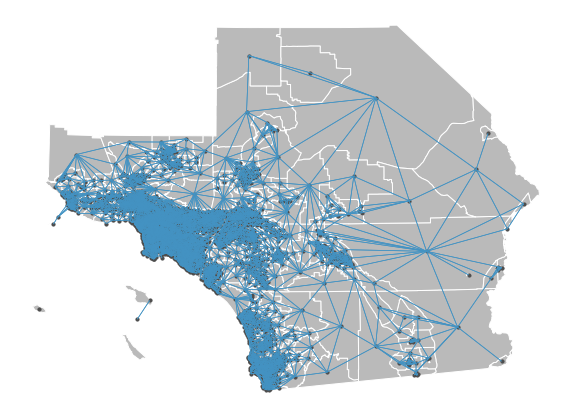

In [38]:
plot_spatial_weights(q_weight, df)

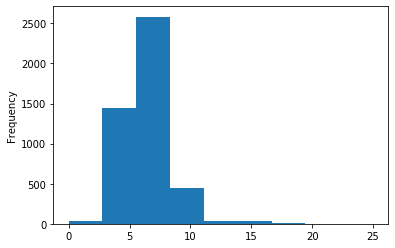

In [39]:
pd.Series(q_weight.cardinalities).plot.hist(bins=9)

#### Rook Weights

Polygons are considered neighbors if they share at least one edge

In [40]:
r_weight = Rook.from_dataframe(df)

/Users/cristian/opt/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 4285.
  warnings.warn(message)


In [41]:
r_weight[155]

{4528: 1.0, 547: 1.0, 2133: 1.0, 2744: 1.0}

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc1b6208650>)

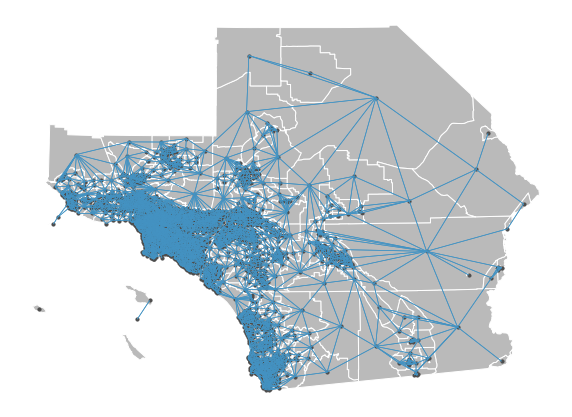

In [43]:
plot_spatial_weights(r_weight, df)

#### Bishop Weights

Only polygons that share vertexes are considered neighbors (Unlike Queen, where it could be either vertexes or edges and Rook, where they must share at least one edge)

In [44]:
b_weight = libpysal.weights.w_difference(q_weight, r_weight, constrained=False)

/Users/cristian/opt/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2333 disconnected components.
 There are 1624 islands with ids: 2, 5, 7, 8, 12, 13, 16, 21, 24, 25, 29, 31, 35, 39, 40, 41, 42, 43, 44, 48, 51, 56, 62, 70, 71, 73, 74, 89, 90, 94, 98, 100, 101, 102, 103, 108, 110, 112, 115, 122, 128, 129, 131, 135, 136, 138, 140, 144, 147, 151, 155, 157, 161, 162, 164, 172, 184, 200, 202, 203, 204, 209, 214, 216, 219, 222, 224, 226, 227, 230, 235, 237, 242, 243, 244, 245, 247, 248, 250, 253, 254, 255, 256, 258, 261, 262, 270, 272, 282, 284, 287, 288, 291, 293, 294, 297, 298, 299, 300, 305, 307, 308, 310, 313, 315, 325, 328, 329, 333, 335, 337, 338, 340, 344, 345, 346, 350, 351, 353, 355, 359, 360, 362, 363, 369, 371, 372, 378, 381, 383, 390, 392, 393, 396, 400, 402, 403, 405, 408, 410, 413, 415, 418, 420, 421, 424, 428, 430, 431, 438, 443, 444, 446, 450, 456, 458, 460, 473, 474, 476, 481, 482, 48

In [46]:
b_weight.histogram

[(0, 1624), (1, 1728), (2, 881), (3, 292), (4, 55)]

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc1b6410b50>)

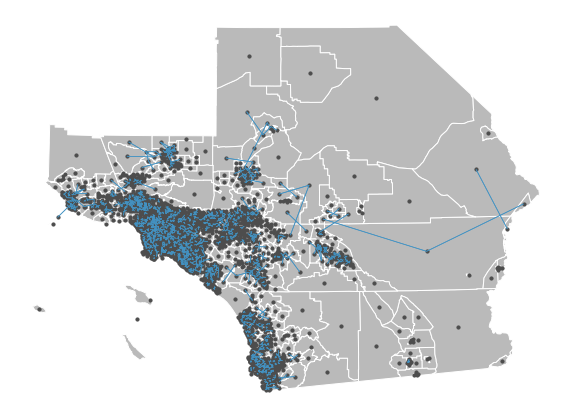

In [47]:
plot_spatial_weights(b_weight, df)

### Distance

In [48]:
df.crs

<Projected CRS: EPSG:26911>
Name: NAD83 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 120°W and 114°W - onshore and offshore. Canada - Alberta; British Columbia; Northwest Territories; Nunavut. United States (USA) - California; Idaho; Nevada, Oregon; Washington.
- bounds: (-120.0, 30.88, -114.0, 83.5)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Only those polygons whose centroids are less than a certain distance apart, are considered neighbors. 
This value can be defined through the `threshold` parameter

dist_band = DistanceBand.from_dataframe(df, threshold=2000)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc1b6383a50>)

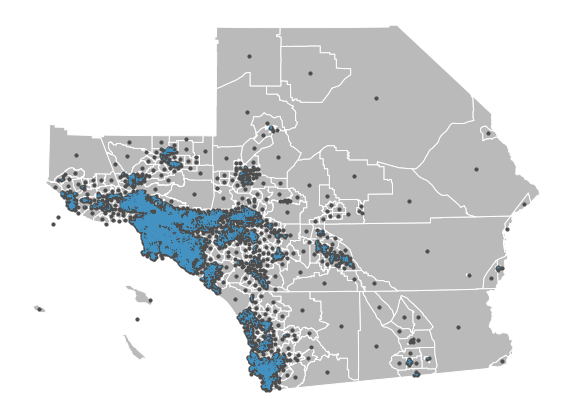

In [50]:
plot_spatial_weights(dist_band, df)

### KNN Defined Weights
For each polygon, only the nearest K polygons are considered neighbors. The number of neighbors (K) can be defined through the `k` parameter

In [51]:
radius_mile = libpysal.cg.sphere.RADIUS_EARTH_MILES
radius_mile

3958.755865744055

In [52]:
df_latlong = df.to_crs(4326)

In [53]:
# Consider earth curvature by using the radius parameter (in this case, earth's radius in miles)
knn8 = KNN.from_dataframe(df_latlong, k=8, radius=radius_mile)
knn8.histogram

[(8, 4580)]

In [54]:
knn8.neighbors[1487]

[501, 2960, 2296, 974, 167, 4496, 2881, 2297]

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc1b4354850>)

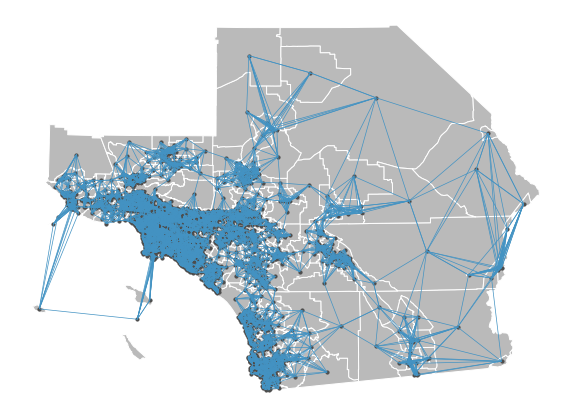

In [87]:
plot_spatial_weights(knn8, df)

#### Kernel Weights

Unlike the previous weights; which can be considered binary, kernel weights are continuous-based weights that use kernel densities to define the neighbor relationship. They estimate a bandwidth, which is a parameter governig how far out observations are considered neigbours. The idea is using this bandwidth to obtain a weight between 0 and 1 by evaluating a kernel function 

##### Adaptive Gaussian Kernel Weight
bandwidth = distance to the kth nearest neighbour to each observation

In [56]:
# fixed = False, the bandwidth changes across observations
kernel_weight = Kernel.from_dataframe(df, k=10, fixed=False, function='gaussian')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc1a4c21e50>)

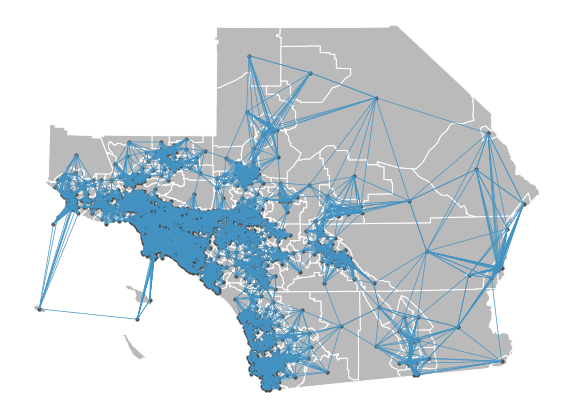

In [57]:
plot_spatial_weights(kernel_weight, df)

In [58]:
kernel_weight.bandwidth

array([[1687.99751736],
       [1997.79636883],
       [1803.3632643 ],
       ...,
       [2468.39103021],
       [3480.79114847],
       [1749.84752449]])

In [60]:
len(kernel_weight.bandwidth)

4580

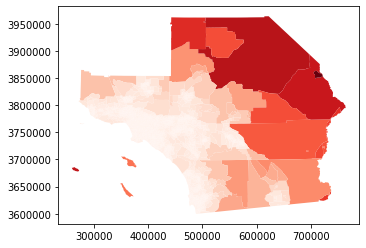

In [61]:
df.assign(bandwidth=kernel_weight.bandwidth.flatten()).plot('bandwidth', cmap='Reds')

### Block Weights

In [72]:
w, s, e, n = df.total_bounds # Geodataframe bounds

In [73]:
center_x = (w + e) / 2
center_y = (n + s) / 2

In [67]:
import shapely

In [68]:
centroids = df.geometry.centroid

In [69]:
# list of longitudes and latitudes
lon = centroids.apply(lambda p: p.x).values
lat = centroids.apply(lambda p: p.y).values

In [74]:
north = lat > center_y
south = lat <= center_y
east = lon > center_x
west = lon <= center_x

In [79]:
north

array([False,  True,  True, ...,  True, False,  True])

In [75]:
# e.g. if both north and west are 1, the polygon is located in the NW and it will be assigned to quad 2
nw = west * north * 2 
ne = east * north * 1
sw = west * south * 3
se = east * south * 4
quad = nw + ne + sw + se

In [76]:
# Single array indicating whether the polygon 
# is located NW, NE, SW or SE
quad 

array([3, 2, 2, ..., 2, 4, 2])

In [80]:
type(quad)

numpy.ndarray

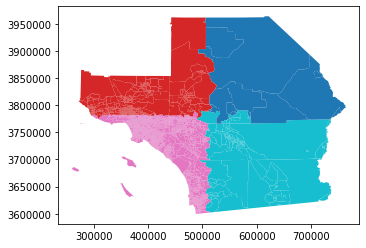

In [77]:
df['quad'] = quad
df.plot(column='quad', categorical=True)

In [78]:
df.head()

,geoid,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,...,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled,geometry,quad
0,06037128702,58.0,0.0,223.0,0.0,475.0,986.0,None,None,None,...,2903.0,64.726214,None,None,None,None,None,None,"POLYGON ((366469.395 3781383.154, 367274.320 3...",3
1,06037131600,83.0,62.0,777.0,0.0,135.0,1355.0,None,None,None,...,1487.0,28.679979,None,None,None,None,None,None,"POLYGON ((356092.493 3787689.814, 356495.267 3...",2
2,06037134104,287.0,17.0,816.0,0.0,61.0,1323.0,None,None,None,...,1388.0,14.846188,None,None,None,None,None,None,"POLYGON ((354475.226 3787187.203, 354877.648 3...",2
3,06037134304,90.0,24.0,298.0,0.0,89.0,520.0,None,None,None,...,928.0,33.378933,None,None,None,None,None,None,"POLYGON ((351261.681 3787675.747, 351660.138 3...",2
4,06037242000,0.0,229.0,681.0,0.0,0.0,1164.0,None,None,None,...,1054.0,0.058565,None,None,None,None,None,None,"POLYGON ((384094.465 3756080.466, 384101.841 3...",3


In [81]:
block_weight = libpysal.weights.block_weights(df['quad'])

/Users/cristian/opt/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  warnings.warn(message)


In [82]:
block_weight.n

4580

In [83]:
block_weight.pct_nonzero

65.53761369920483

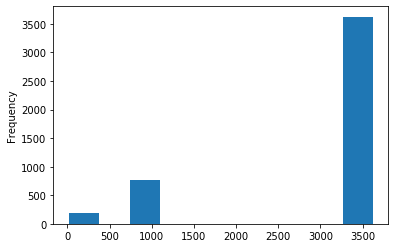

In [85]:
pd.Series(block_weight.cardinalities).plot.hist()

In [86]:
df.groupby('quad').count()

,geoid,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,...,year,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled,geometry
quad,,,,,,,,,,,,,,,,,,,,,
1,15,15,15,15,15,15,15,0,0,0,...,15,15,15,0,0,0,0,0,0,15
2,761,761,761,761,761,761,761,0,0,0,...,761,761,755,0,0,0,0,0,0,761
3,3625,3625,3625,3625,3625,3625,3625,0,0,0,...,3625,3625,3612,0,0,0,0,0,0,3625
4,179,179,179,179,179,179,179,0,0,0,...,179,179,179,0,0,0,0,0,0,179


#### Excercise
 1. How many tracts have fewer neighbors under rook contiguity relative to knn with k=4?
 1. How many tracts have identical neighbors under queen contiguity and queen rook contiguity?

In [90]:
knn = KNN.from_dataframe(df, k=4)
print(f'% Non-zero weights in KNN: {knn.pct_nonzero}')

rook = Rook.from_dataframe(df)
print(f'% Non-zero weights in Rook: {rook.pct_nonzero}')

queen = Queen.from_dataframe(df)

# Question 1
tract_ids = []
for i in knn.neighbors:
    if len(knn[i]) > len(rook[i]):
        tract_ids.append(i)
print(f'There are { len(tract_ids) } that have fewer Rook neighbors than KNN neighbors')

# Question 2
identical = []
for i in rook.neighbors:
    if set(rook.neighbors[i]) == set(queen.neighbors[i]):
        identical.append(i)
print(f'There are { len(identical) } that have identical Queen and Rook neighbors')

% Non-zero weights in KNN: 0.08733624454148471


/Users/cristian/opt/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 4285.
  warnings.warn(message)


% Non-zero weights in Rook: 0.11817089681737572
There are 280 that have fewer Rook neighbors than KNN neighbors
There are 1624 that have identical Queen and Rook neighbors
